Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Running
Job Done.
Ending Job Monitor
Measurement results: {'0000000000': 6, '0000000001': 9, '0000000010': 7, '0000000011': 9, '0000000100': 6, '0000000101': 2, '0000000110': 7, '0000000111': 8, '0000001000': 4, '0000001001': 6, '0000001010': 5, '0000001011': 3, '0000001100': 7, '0000001101': 6, '0000001110': 4, '0000001111': 6, '0000010000': 5, '0000010001': 5, '0000010010': 8, '0000010011': 6, '0000010100': 2, '0000010101': 6, '0000010110': 4, '0000010111': 6, '0000011000': 2, '0000011001': 6, '0000011010': 4, '0000011011': 8, '0000011100': 2, '0000011101': 5, '0000011110': 3, '0000011111': 

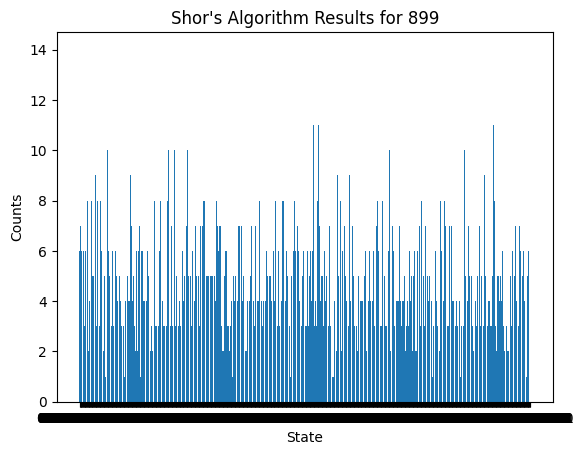

Job Done.


In [1]:
import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
import numpy as np
import matplotlib.pyplot as plt

# Constants
N = 899
a = 7
n = 10

# Setup
provider = QuantumRingsProvider(
    token='rings-200.yTkBfDDmhAyjM0ZQ8jZP7UYslqa7gvG3',
    name='empirerahul077@gmail.com'
)
backend = provider.get_backend("scarlet_quantum_rings")
shots = 5000

# Quantum Registers
q_x = QuantumRegister(n, 'q_x')
q_a = QuantumRegister(n, 'q_a')
c = ClassicalRegister(n, 'c')
ancilla = QuantumRegister(n, 'ancilla')
qc = QuantumCircuit(q_x, q_a, c, ancilla)

# Initialize
for i in range(n):
    qc.h(q_x[i])
qc.barrier()

# Define Modular Exponentiation Function Before Use
def modular_exponentiation(qc, a, N, q_x, q_a, ancilla):
    a_bin = bin(a)[2:].zfill(n)  # Binary representation of 'a'
    
    for i in range(n):  # For each bit in x
        for j in range(n):  # For each bit of 'a'
            if a_bin[j] == '1':
                # Controlled multiplication by 'a' if x_i is 1
                qc.cx(q_x[i], ancilla[j])  # Control by q_x[i] on ancilla
                for k in range(n):
                    if j == k:
                        qc.cx(ancilla[j], q_a[k])
                    # Add gates for carry here if needed

        # Reset ancilla for next bit operation
        for k in range(n):
            qc.reset(ancilla[k])

    # Modular reduction - this would be much more involved in practice
    for i in range(n):
        if i > 0:
            qc.cx(q_a[i], q_a[i-1])  # Simulate carry
        qc.cx(q_a[0], ancilla[0])  # Check if result > N-1

    for i in range(n):
        qc.reset(ancilla[i])

# Modular Exponentiation
modular_exponentiation(qc, a, N, q_x, q_a, ancilla)

# IQFT
def iqft_cct(qc, q, n):
    for qubit in range(n // 2):
        qc.swap(q[qubit], q[n - qubit - 1])
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / float(2 ** (j - m)), q[m], j)
        qc.h(q[j])

iqft_cct(qc, q_x, n)

# Measure
for i in range(n):
    qc.measure(q_x[i], c[i])

# Run Job
job = backend.run(qc, shots=shots)
job_monitor(job)

# Analyze Results
result = job.result()
counts = result.get_counts()
print("Measurement results:", counts)

# Plot
plt.bar(counts.keys(), counts.values())
plt.xlabel("State")
plt.ylabel("Counts")
plt.title(f"Shor's Algorithm Results for {N}")
plt.show()

print("Job Done.")